In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Size of the data
size = 2500

# Initialize arrays for x, y, and class
x = np.random.uniform(-100, 100, size)    # Generate 2500 random floating-point values for x between -100 and 100
y = np.random.uniform(-100, 100, size)    # Generate 2500 random floating-point values for y between -100 and 100
classes = np.zeros(size)                  # Initialize with 2500 zeros which is used for class labels

In [18]:
# Classify the points
for i in range(size):
    if y[i] < x[i]:            #if the point is below the line y = x, consider as class -1
        classes[i] = -1
    else: # point is above the line y = x
        classes[i] = 1

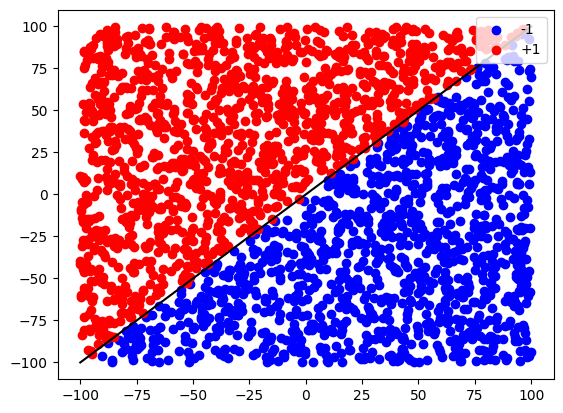

In [19]:
# plot the model
plt.scatter(x[classes==-1], y[classes==-1], color='blue', label='-1')
plt.scatter(x[classes==1], y[classes==1], color='red', label='+1')
plt.plot([-100, 100], [-100, 100], color='black')
plt.legend()
plt.show()


In [21]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [26]:
# Prepare the data
data = list(zip(x, y))
labels = classes
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)   # Split the data into training and testing sets
perceptron_model = Perceptron(tol=1e-3)                                 # Initialize the perceptron
scores = cross_val_score(perceptron_model, x_train, y_train, cv=5)      # Perform cross-validation
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
perceptron_model.fit(x_train, y_train)
print("Test set score: ", perceptron_model.score(x_test, y_test))       # Evaluate the model


Cross-validation scores:  [1.         0.99714286 1.         1.         1.        ]
Mean cross-validation score:  0.9994285714285714
Test set score:  0.9986666666666667


In [28]:
# Prepare the data
data = np.array(list(zip(x, y)))
labels = np.array(classes)
data = np.hstack((np.ones((data.shape[0], 1)), data))     # Add bias term to the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)   # Split the data into training and testing sets

# Initialize the pocket algorithm
def pocket_algo(X, Y, T):
    w = np.zeros(X.shape[1])
    best_w = np.copy(w)
    best_error = np.inf

    for t in range(T):
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != Y[i]:
                w = w + Y[i] * X[i]
                error = np.sum((np.sign(np.dot(X, w)) != Y))
                if error < best_error:
                    best_error = error
                    best_w = np.copy(w)
    return best_w

w = pocket_algo(x_train, y_train, 1000)                       # Fit the model
train_preds = np.sign(np.dot(x_train, w))                     # Evaluate the model
test_preds = np.sign(np.dot(x_test, w))

train_accuracy = np.mean(train_preds == y_train)
test_accuracy = np.mean(test_preds == y_test)

print("Training set score: ", train_accuracy)
print("Test set score: ", test_accuracy)

Training set score:  1.0
Test set score:  1.0
